In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition

csv_filename = 'data/genotype_matrix.csv'

df = pd.read_csv(csv_filename)
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df

,Sample,rs149201999,rs148791235,rs150417216,rs76462367,rs142219942,rs188162768,rs149051471,rs181920581,rs201154583,...,rs6010063,rs8137951,rs115360146,rs187441595,rs9616958,rs145592192,rs192592803,rs75340827,rs183253204,Population code
0,HG00096,0,0,0,2,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,GBR
1,HG00097,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,0,2,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,GBR
3,HG00100,0,0,0,2,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,2,0,0,0,0,0,...,2,1,0,0,1,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,1,0,0,0,0,0,...,2,2,0,0,0,0,0,1,0,TSI
1089,NA20819,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI


In [54]:

non_snp_columns = ['Population code', 'Sample']

# Drop the columns
df_only_snps = df.drop(non_snp_columns, axis=1)

matrix = df_only_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 4944)


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1092, 4944))

In [55]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08090641 0.05957693]
[191.70412886 164.50498454]


(1092, 2)
1092
1092


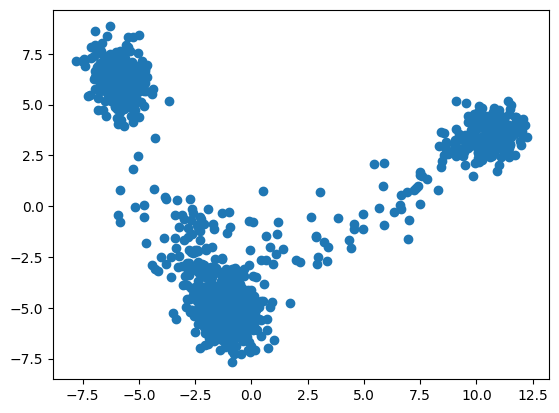

In [56]:
transformed_to_plot = pca.transform(matrix)
print(transformed_to_plot.shape)
print(len(transformed_to_plot[:, 0]))
print(len(transformed_to_plot[:, 1]))

plt.scatter(x=transformed_to_plot[:, 0], y=transformed_to_plot[:, 1])

In [ ]:

import altair as alt

df_plot = df[non_snp_columns].copy()
df_plot 


,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [58]:
df_plot['PC1'] = transformed_to_plot[:, 0]
df_plot['PC2'] = transformed_to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,-0.573572,-5.695828
1,GBR,HG00097,-1.082476,-6.676701
2,GBR,HG00099,-0.402576,-5.052673
3,GBR,HG00100,0.144231,-7.099847
4,GBR,HG00101,-0.941056,-4.211418
...,...,...,...,...
1087,TSI,NA20816,-1.017831,-5.824593
1088,TSI,NA20818,-1.544913,-5.405481
1089,TSI,NA20819,-0.610320,-6.035342
1090,TSI,NA20826,0.163686,-5.332317


In [32]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20')),
    shape='Population code',
    
)

alt.Chart(...)

In [33]:
pop = pd.read_csv('data/igsr_populations.tsv', sep='\t')
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GWD,GWD,Gambian Mandinka,"Gambian in Western Division, The Gambia - Mand...",13.454876,-16.579032,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,MSL,MSL,Mende,Mende in Sierra Leone,8.480000,-13.230000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,ESN,ESN,Esan,Esan in Nigeria,9.066660,7.483333,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,IBS,IBS,Iberian,Iberian populations in Spain,40.380000,-3.720000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,TSI,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...
207,YRI,YRI,Yoruba,"Yoruba in Ibadan, Nigeria",7.400000,3.920000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
208,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",-1.270000,36.610000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
209,GIH,GIH,Gujarati,"Gujarati Indians in Houston, TX",29.758900,-95.367700,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
210,GWF,GWF,Gambian Fula,"Gambian in Western Division, The Gambia - Fula",13.454876,-16.579032,AFR,African Ancestry,#ffd845,1,"Gambian Genome Variation Project (GRCh37),Gamb..."


In [36]:
df_plot_with_pop = df_plot.merge(pop, on='Population code', how='inner').copy()
df_plot_with_pop

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,-0.573572,-5.695828,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-1.082476,-6.676701,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.402576,-5.052673,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,0.144231,-7.099847,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.941056,-4.211418,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,-1.017831,-5.824593,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.544913,-5.405481,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,-0.610320,-6.035342,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.163686,-5.332317,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [40]:
alt.Chart(df_plot_with_pop).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    shape='Superpopulation name',
    # fill='Population code',
)

alt.Chart(...)

In [41]:
from sklearn.manifold import TSNE

x = matrix
x_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x)
x_embedded.shape

(1092, 2)

In [43]:
df_plot_with_pop['tsne1'] = x_embedded[:, 0]
df_plot_with_pop['tsne2'] = x_embedded[:, 1]
df_plot_with_pop

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tsne1,tsne2
0,GBR,HG00096,-0.573572,-5.695828,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-10.176775,-18.316015
1,GBR,HG00097,-1.082476,-6.676701,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.616725,-18.584969
2,GBR,HG00099,-0.402576,-5.052673,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.385942,-12.839013
3,GBR,HG00100,0.144231,-7.099847,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",6.276261,-18.285995
4,GBR,HG00101,-0.941056,-4.211418,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",1.299970,-21.002939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,-1.017831,-5.824593,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",2.971193,-12.332913
1088,TSI,NA20818,-1.544913,-5.405481,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",4.257385,-15.025307
1089,TSI,NA20819,-0.610320,-6.035342,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",1.029282,-16.871000
1090,TSI,NA20826,0.163686,-5.332317,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",4.266094,-14.164814


In [45]:
alt.Chart(df_plot_with_pop).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20')),
    # fill='Population code',
)

alt.Chart(...)

In [44]:
alt.Chart(df_plot_with_pop).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    shape='Superpopulation name',
    # fill='Population code',
)

alt.Chart(...)